In [63]:
import numpy as np
import pandas as pd
import nashpy as nash
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
effi = pd.read_csv("type.csv", sep='\t', index_col=0)
pokemon = pd.read_csv("stats.csv", sep='\t')
pokemon.Type1 = pokemon.Type1.str.upper()
pokemon.Type2 = pokemon.Type2.str.upper()
pokemon.Atk += 15
pokemon.Def += 15
pokemon.Sta += 15
n = len(pokemon)
pokemon

,Name,Type1,Type2,Atk,Def,Sta,Quick,Type_Q,Power1,Energy1,Time1,Stab1,Charge,Type_C,Power2,Energy2,Time2,Stab2
0,Venusaur,GRASS,POISON,212,213,175,Vine Whip,GRASS,7,6,0.6,1.25,Solar Beam,GRASS,180,100,4.9,1.25
1,Venusaur,GRASS,POISON,212,213,175,Razor Leaf,GRASS,13,7,1.0,1.25,Solar Beam,GRASS,180,100,4.9,1.25
2,Venusaur,GRASS,POISON,212,213,175,Vine Whip,GRASS,7,6,0.6,1.25,Sludge Bomb,POISON,80,50,2.3,1.25
3,Venusaur,GRASS,POISON,212,213,175,Razor Leaf,GRASS,13,7,1.0,1.25,Sludge Bomb,POISON,80,50,2.3,1.25
4,Venusaur,GRASS,POISON,212,213,175,Vine Whip,GRASS,7,6,0.6,1.25,Petal Blizzard,GRASS,110,100,2.6,1.25
5,Venusaur,GRASS,POISON,212,213,175,Razor Leaf,GRASS,13,7,1.0,1.25,Petal Blizzard,GRASS,110,100,2.6,1.25
6,Charizard,FIRE,FLYING,237,192,171,Fire Spin,FIRE,14,10,1.1,1.25,Overheat,FIRE,160,100,4.0,1.25
7,Charizard,FIRE,FLYING,237,192,171,Air Slash,FLYING,14,10,1.2,1.25,Overheat,FIRE,160,100,4.0,1.25
8,Charizard,FIRE,FLYING,237,192,171,Fire Spin,FIRE,14,10,1.1,1.25,Fire Blast,FIRE,140,100,4.2,1.25
9,Charizard,FIRE,FLYING,237,192,171,Fire Spin,FIRE,14,10,1.1,1.25,Flamethrower,FIRE,70,50,2.2,1.25


In [16]:
payoff = np.zeros((n, n))

In [61]:
for i in range(n):
    for j in range(n):
        attacker, defender = pokemon.iloc[i], pokemon.iloc[j]
        attacker_power = attacker.Atk * attacker.Def * attacker.Sta
        defender_power = defender.Atk * defender.Def * defender.Sta * 2

        quick_damage = attacker.Power1 * attacker.Stab1 * effi.loc[attacker.Type_Q, defender.Type1] * effi.loc[attacker.Type_Q, defender.Type2]
        charge_damage= attacker.Power2 * attacker.Stab2 * effi.loc[attacker.Type_C, defender.Type1] * effi.loc[attacker.Type_C, defender.Type2]
        weight = attacker.Energy1 / attacker.Energy2
        attacker_dps = (quick_damage + weight * charge_damage) / (attacker.Time1 + weight * attacker.Time2)
        attacker_dps = max(attacker_dps, quick_damage / attacker.Time1)
                
        quick_damage = defender.Power1 * defender.Stab1 * effi.loc[defender.Type_Q, attacker.Type1] * effi.loc[defender.Type_Q, attacker.Type2]
        charge_damage= defender.Power2 * defender.Stab2 * effi.loc[defender.Type_C, attacker.Type1] * effi.loc[defender.Type_C, attacker.Type2]
        weight = defender.Energy1 / defender.Energy2
        defender_dps = (quick_damage + weight * charge_damage) / (defender.Time1 + 2 + weight * (defender.Time2 + 2))
        
        payoff[i, j] = np.log(attacker_power * attacker_dps / defender_power / defender_dps)

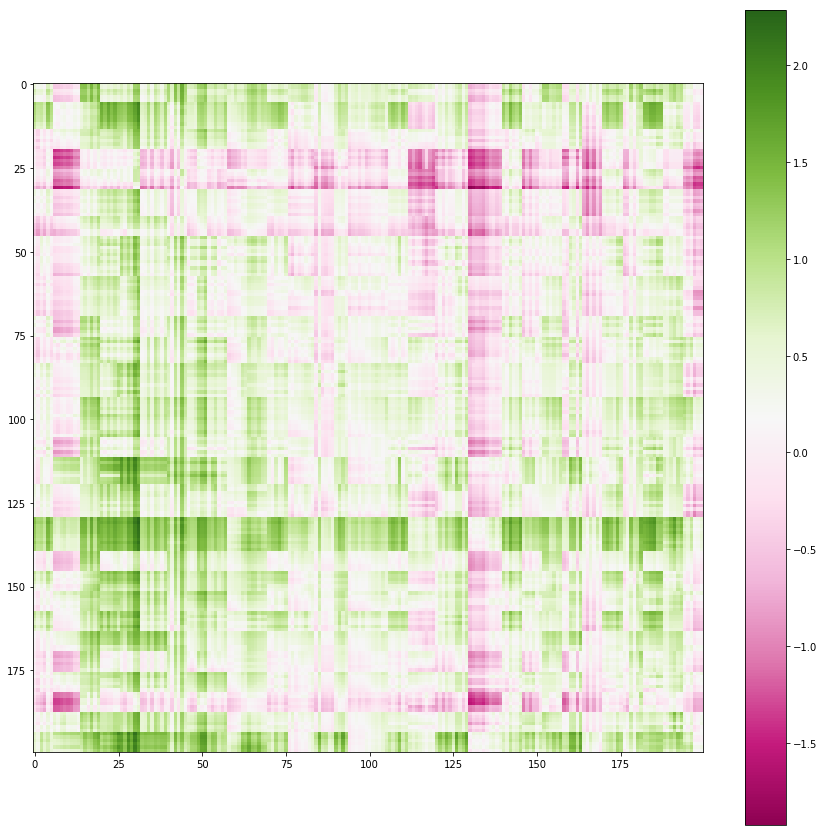

In [71]:
plt.figure(figsize=(15, 15))
plt.imshow(payoff, cmap='PiYG')
plt.colorbar()

In [72]:
game = nash.Game(payoff)

In [73]:
eqs = game.support_enumeration()

In [ ]:
list(eqs)